## Handwritten Digit Recognizer using Deep Learning:

In this project, we will try to identify hand written digits by using the power of deep learning.
We will be working on the MNIST dataset to create a deep learning classification model & see how our model performs in acurately predicting images with the correct digit notation.

MNIST is a database of handwritten digits made up of a training set of 60,000 examples, and a test set of 10,000 examples. The training examples are annotated by humans with the correct answer. For instance, if the handwritten digit is the number "3", then 3 is simply the label associated with that example.

We will train our model with the samples available in the training set, and then use the test set to evaluate how well our neural network has learned to recognize digits.

Let's create a Convolutional Neural Network to solve this problem.

### Import Libraries:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

%matplotlib inline

In [ ]:
tf.__version__

'2.6.0'

### Import MNIST Dataset:

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (60000, 28, 28)
Shape of X_test :  (10000, 28, 28)
Shape of y_train :  (60000,)
Shape of y_test :  (10000,)


#### Each MNIST image is in grayscale and consists of 28*28 pixels.

In [ ]:
from PIL import Image
Image.open('mnist.png')

FileNotFoundError: ignored

### Load Sample images from the MNIST dataset:

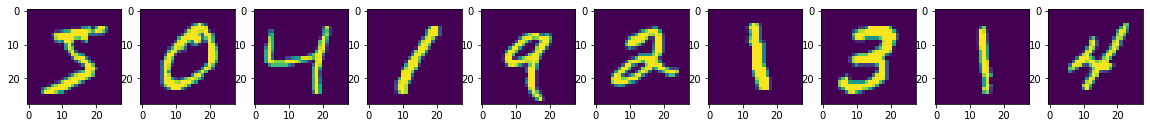

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(1,10,1)
plt.imshow(X_train[0])
plt.subplot(1,10,2)
plt.imshow(X_train[1])
plt.subplot(1,10,3)
plt.imshow(X_train[2])
plt.subplot(1,10,4)
plt.imshow(X_train[3])
plt.subplot(1,10,5)
plt.imshow(X_train[4])
plt.subplot(1,10,6)
plt.imshow(X_train[5])
plt.subplot(1,10,7)
plt.imshow(X_train[6])
plt.subplot(1,10,8)
plt.imshow(X_train[7])
plt.subplot(1,10,9)
plt.imshow(X_train[8])
plt.subplot(1,10,10)
plt.imshow(X_train[9])

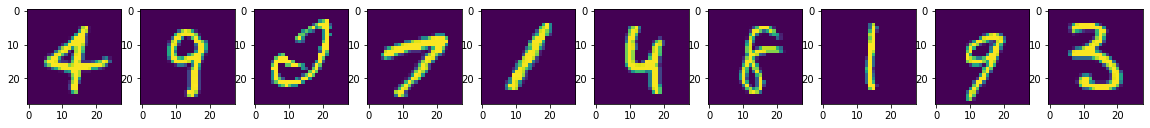

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(1,10,1)
plt.imshow(X_train[150])
plt.subplot(1,10,2)
plt.imshow(X_train[162])
plt.subplot(1,10,3)
plt.imshow(X_train[178])
plt.subplot(1,10,4)
plt.imshow(X_train[193])
plt.subplot(1,10,5)
plt.imshow(X_train[205])
plt.subplot(1,10,6)
plt.imshow(X_train[3978])
plt.subplot(1,10,7)
plt.imshow(X_train[456])
plt.subplot(1,10,8)
plt.imshow(X_train[7896])
plt.subplot(1,10,9)
plt.imshow(X_train[57])
plt.subplot(1,10,10)
plt.imshow(X_train[31897])

### Data Preprocessing:

The image data cannot be fed directly into the model.
So we need to perform some operations and process the data to make it ready for our neural network.
The dimension of the training data is (60000,28,28).
The CNN model will require one more dimension so we reshape the matrix to shape (60000,28,28,1).
This extra dimension is for the color channel, for grayscale images like MNIST, its value is 1.
For color images, the channel value is 3 corresponding to Red, Green & Blue (RGB).

In [ ]:
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)

Shape of X_train :  (60000, 28, 28)
Shape of X_test :  (10000, 28, 28)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

input_shape = (28,28,1)

print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)

Shape of X_train :  (60000, 28, 28, 1)
Shape of X_test :  (10000, 28, 28, 1)


### One Hot Encoding of target labels:

We are going to use OHE as a simple tool to encode information used inside neural networks.
In many applications it is convenient to transform categorical (non-numerical) features into numerical variables. For instance, the categorical feature "digit" with value d in [0 – 9] can be encoded into a binary vector with 10 positions, which always has 0 value except the d - th position where a 1 is present.

For example, the digit 3 can be encoded as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. This type of representation is called One-hot encoding, or sometimes simply one-hot, and is very common in data mining when the learning algorithm is specialized in dealing with numerical functions.

In [ ]:
y_train[0:11]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3], dtype=uint8)

In [ ]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

y_cat_train[0:11]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Scaling feature data:

Neural Networks work well when the feature values lie between 0 to 1.
Hence we will scale the dataset by simply dividing each value by 255.
The values for each pixel in case of gray scale images range from 0 (white) to 255 (black).

In [ ]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [ ]:
X_train[0]

array([[[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]

### Model Creation:

Now we will create our CNN model.
A CNN model generally consists of convolutional and pooling layers. It works better for data that are represented as grid structures, this is the reason why CNN works well for image classification problems.

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

### Model Summary:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2359552   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

### Adding Early Stopping:

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

### Model Training:

In [ ]:
model.fit(X_train, y_cat_train, epochs=2, callbacks = [early_stop], validation_data=(X_test, y_cat_test))

print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/2
1875/1875 [==============================] - 157s 84ms/step - loss: 0.2626 - accuracy: 0.9193 - val_loss: 0.1452 - val_accuracy: 0.9545
Epoch 2/2
1875/1875 [==============================] - 156s 83ms/step - loss: 0.1720 - accuracy: 0.9462 - val_loss: 0.1166 - val_accuracy: 0.9630
The model has successfully trained
Saving the model as mnist.h5


### Model Performance during training & validation:

In [ ]:
training_metrics = pd.DataFrame(model.history.history)
training_metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

In [ ]:
training_metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.262561,0.919317,0.145196,0.9545
1,0.172009,0.946217,0.116647,0.9630


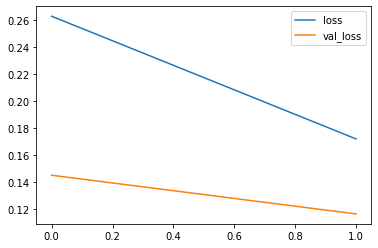

In [ ]:
training_metrics[['loss','val_loss']].plot()

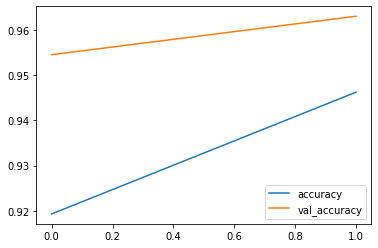

In [ ]:
training_metrics[['accuracy','val_accuracy']].plot()

In [ ]:
score = model.evaluate(X_test, y_cat_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11664677411317825
Test accuracy: 0.9629999995231628


### Model Predictions:

In [ ]:
predictions = np.argmax(model.predict(X_test), axis=-1)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.98      0.94      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.94      0.97      0.96       892
           6       0.96      0.98      0.97       958
           7       0.94      0.97      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.97      0.92      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [ ]:
print(confusion_matrix(y_test, predictions))

[[ 973    0    2    1    0    0    4    0    0    0]
 [   0 1124    1    3    0    1    4    1    1    0]
 [   0    0 1019    5    0    0    0    4    3    1]
 [   0    0    0 1008    0    1    0    0    1    0]
 [   0    0    1    0  955    0    5    1    3   17]
 [   0    0    1    7    0  883    1    0    0    0]
 [   6    1    0    0    1    1  949    0    0    0]
 [   1    0    5    2    0    0    0 1017    1    2]
 [   3    0    1    1    0    1    0    1  965    2]
 [   1    0    2    1    1   11    0    4    5  984]]


### Visualizing confusion matrix:

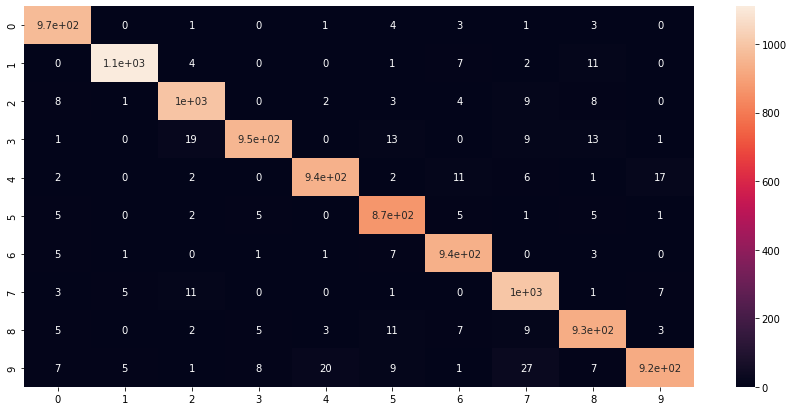

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True)

### Predicting individual images:

TypeError: ignored

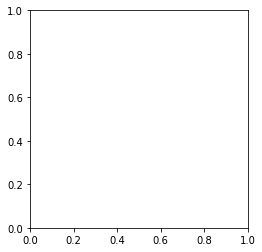

In [ ]:
new_img = X_test[95]
plt.imshow(new_img)

In [ ]:
y_test[95]

4

In [ ]:
np.argmax(model.predict(new_img.reshape(1,28,28,1)), axis=-1)

array([4], dtype=int64)

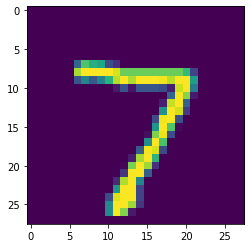

In [ ]:
new_img2 = X_test[0]
plt.imshow(new_img2)

In [ ]:
y_test[0]

7

In [ ]:
np.argmax(model.predict(new_img2.reshape(1,28,28,1)), axis=-1)

array([7], dtype=int64)

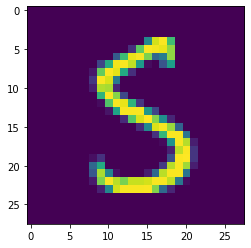

In [ ]:
new_img3 = X_test[397]
plt.imshow(new_img3)

In [ ]:
y_test[397]

5

In [ ]:
np.argmax(model.predict(new_img3.reshape(1,28,28,1)), axis=-1)

array([5], dtype=int64)